<a href="https://colab.research.google.com/github/Rotha-Vichet/ML-finalProject/blob/main/HeartDiseasePredictionDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#lib
import sklearn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [ ]:
# Importing dataset
df = pd.read_csv('https://raw.githubusercontent.com/Rotha-Vichet/ML-finalProject/main/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Check dataset

In [ ]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#Start set variable

In [ ]:
x_variable = ['age', 'sex', 'cp','trestbps','chol','fbs','restecg','thalach', 'exang','oldpeak', 'slope', 'ca', 'thal']
y_variable = ['target']
len(x_variable)
#reshape variable
x = df[x_variable].values.reshape(-1,13)#1st value is -1,next value is the length of x_variable
y = df[y_variable].values.reshape(-1,1)
print(x.shape)
print(y.shape)

(303, 13)
(303, 1)


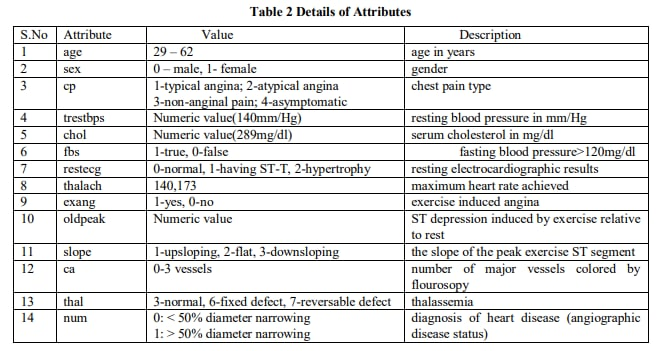

In [ ]:
#Cate to numerriacal
# le_sex = preprocessing.LabelEncoder()
# le_sex.fit(['0', '1'])
# x[:,1] = le_sex.transform(x[:,1]) 

# le_cp = preprocessing.LabelEncoder()
# le_cp.fit(['1', '2', '3', '4'])
# x[:,2] = le_cp.transform(x[:,2]) 

# le_fbs = preprocessing.LabelEncoder()
# le_fbs.fit(['1', '0'])
# x[:,5] = le_fbs.transform(x[:,5]) 

# le_restecg= preprocessing.LabelEncoder()
# le_restecg.fit(['0', '1', '2'])
# x[:,7] = le_restecg.transform(x[:,7]) 

# le_exang= preprocessing.LabelEncoder()
# le_exang.fit(['0', '1'])
# x[:,9] = le_exang.transform(x[:,9])

# le_slope= preprocessing.LabelEncoder()
# le_slope.fit(['1', '2', '3'])
# x[:,11] = le_slope.transform(x[:,11])

# le_ca= preprocessing.LabelEncoder()
# le_ca.fit(['0','1', '2', '3'])
# x[:,12] = le_ca.transform(x[:,12])

# le_thal= preprocessing.LabelEncoder()
# le_thal.fit(['0','1', '2', '3'])
# x[:,13] = le_thal.transform(x[:,13])

In [ ]:
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = StandardScaler().fit_transform(df[columns_to_scale])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [ ]:
#  split the data set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)

(242, 13)
(61, 13)


In [ ]:
# build model
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
foot_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = None, splitter='best').fit(x_train,y_train)
print(foot_Tree.tree_.max_depth)

9


In [ ]:
# Buildin model
from base64 import decode
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
foot_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
foot_Tree # it shows the default parameters 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# prediction
y_predict = foot_Tree.fit(x_train,y_train)
predict = foot_Tree.predict(x_test)
# print(predict[0:8])
# print(y_test[0:8])

In [ ]:
print(predict[0:8])
print(y_test[0:15])

[0 0 0 0 0 0 0 0]
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]]


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Decision Tree's Accuracy:", metrics.accuracy_score(y_test, predict))

Decision Tree's Accuracy: 0.819672131147541


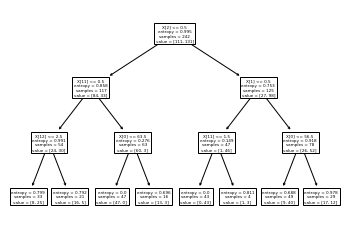

In [ ]:
tree.plot_tree(foot_Tree)
plt.show()

In [ ]:
# for x in range(1,10):
#   foot_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = x, splitter='best').fit(x_train,y_train)
#   print(foot_Tree.tree_.max_depth)
#   predict = foot_Tree.predict(x_test)
#   print("Decision Tree's Accuracy:", metrics.accuracy_score(y_test, predict))